# Ant Colony Optimization

Here we are going to code from scratch a solution to the Travelling Salesman Problem (TSP) using the Ant Colony Optimization algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import copy

start_time = time.time()

# Define the city class that describes the nodes in the TSP
class City:
    # Positions of the city on the world
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # Determine distance between a pair of cities 
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

# Determine the fitness of a given tour. Used to update the pheromone matrix
def sol_score(tour):
    total_distance = 0
    tmp = tour
    
    for index in tmp:
        if index != len(cities) - 1:
            total_distance += cities[int(index)].distance(cities[tmp[index+1]])
        else:
            total_distance += cities[int(index)].distance(cities[0])
        
    return total_distance




C:\Users\nicol\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicol\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\nicol\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Parameters
num_ants = 20
num_iter = 50
ALFA = 1
BETA = 2
num_cities = 100
vapo_rate = 0.9

cities = []

# Create Cities
for city in range(num_cities):
    cities.append(City(10*np.random.rand(), 10*np.random.rand()))

# Determine distance matrix that will be used for the heuristics
distance_matrix = np.zeros([num_cities, num_cities])
for row in range(num_cities):
    for column in range(num_cities):
        distance_matrix[row][column] = cities[row].distance(cities[column])

# Initialize pheromone matrix with random values
pheromone_matrix = np.random.rand(num_cities, num_cities)

In [3]:
# Tracker variables for the results
tour_distances = []
avg_tour_distances = []

for iteration in range(num_iter):
    #print(iteration)
    
    # Initialize iteration variables
    pher_matrix_update = np.zeros([num_cities, num_cities])
    avg_tour_distance = 0
    
    for ant in range(num_ants):
        # Initialize each ant variables
        tour = []
        tour_distance = 0
        
        # Determine starting city, and update cities list
        cities_list = np.arange(num_cities)
        curr_city = np.random.choice(cities_list, 1)
        cities_list = np.delete(cities_list, np.where(cities_list == curr_city))
        
        # Traverse Cities
        for step in range(num_cities-1):
            probs = []
            
            for city in cities_list:
                summ = 0
                
                # Determine probabilities of moving onto next city based on pheromone matrix 
                for destiny in cities_list:
                    summ += (pheromone_matrix[int(curr_city)][int(destiny)]**ALFA + (1/cities[int(curr_city)].distance(cities[int(destiny)]))**BETA)
                probs.append((pheromone_matrix[int(curr_city)][int(city)]**ALFA + (1/cities[int(curr_city)].distance(cities[int(city)]))**BETA)/summ)
            
            # Determine next city based on the probabilities
            rand = np.random.rand()
            next_city = np.random.choice(cities_list, 1, p = probs)
            
            # Update current tour, distances and current city
            tour.append(int(curr_city))
            tour_distance += cities[int(curr_city)].distance(cities[int(next_city)])
            curr_city = next_city
            cities_list = np.delete(cities_list, np.where(cities_list == curr_city))
        
        # Update distance stats and save tour for this and
        avg_tour_distance += tour_distance
        tour_distances.append(tour_distance)
        delta_pher = 1/tour_distance
        
        # Update pheromone matrix updater
        for index in range(len(tour) - 1):
            pher_matrix_update[tour[index]][tour[index+1]] += delta_pher
    
    # Calculate stats for full iteration
    avg_tour_distance = avg_tour_distance/num_ants
    avg_tour_distances.append(avg_tour_distance)
    
    # Update pheromone matrix for next iteration
    pheromone_matrix = pheromone_matrix*vapo_rate + pher_matrix_update

Text(0, 0.5, 'Distance')

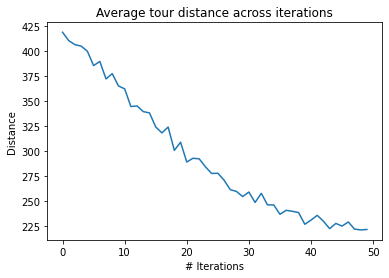

In [4]:
#Plot results across iterations

plt.plot(avg_tour_distances)
plt.title('Average tour distance across iterations')
plt.xlabel('# Iterations')
plt.ylabel('Distance')
plt.savefig('Results.png')